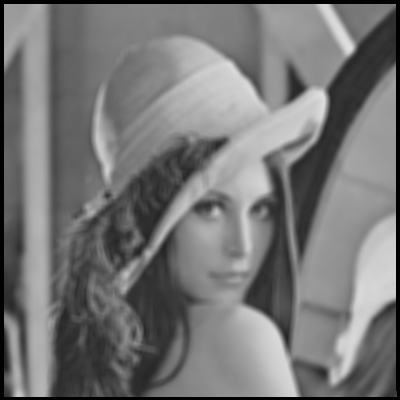

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import cv2
from google.colab.patches import cv2_imshow
from math import ceil
import numpy as np

n = 7
inv_n = 1/(n**2)

mascara = np.ones([n,n]).astype(int)
imagem = cv2.imread('lena.jpg', 0)
#cv2_imshow(imagem)
nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]]).astype(int)

for i in range(len(imagem)):
  for j in range(len(imagem[i])):
    soma = 0
    if (i + n >= len(imagem)):
      break
    for x in range(i, i + n):
      if (j + n >= len(imagem[i])):
        break
      for y in range(j, j + n):
        soma = soma + imagem[x][y]
    media = soma*inv_n
    x_y = ceil(n/2) - 2
    nova_imagem[x - x_y][y - x_y] = media



cv2_imshow(nova_imagem)

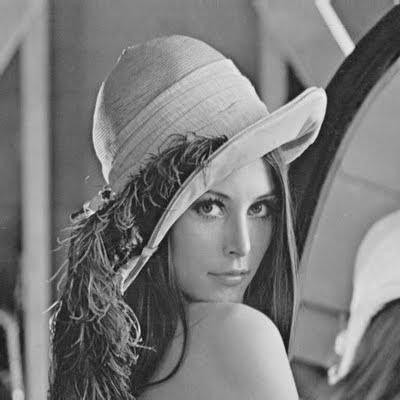

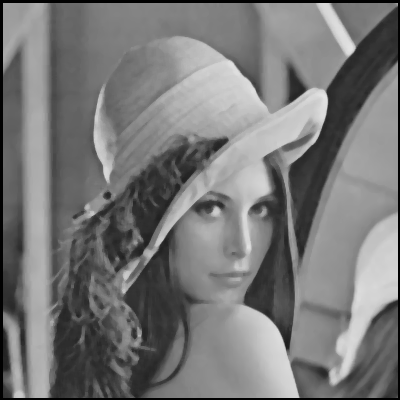

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import cv2
from google.colab.patches import cv2_imshow
from math import ceil
import numpy as np

n = 5

mascara = np.ones([n,n]).astype(int)
imagem = cv2.imread('lena.jpg', 0)
cv2_imshow(imagem)
nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]]).astype(int)

for i in range(len(imagem)):
  for j in range(len(imagem[i])):
    if (i + n >= len(imagem)):
      break
    pixels = []
    for x in range(i, i + n):
      if (j + n >= len(imagem[i])):
        break
      for y in range(j, j + n):
        pixels.append(imagem[x][y])
    pixels.sort()
    x_y = ceil(n/2) - 2
    if (len(pixels) != 0):
      nova_imagem[x - x_y][y - x_y] = pixels[ceil(len(pixels)/2) - 1]



cv2_imshow(nova_imagem)

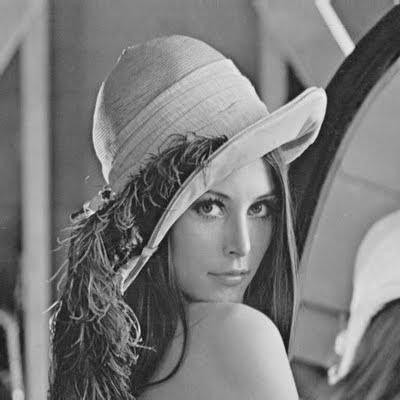

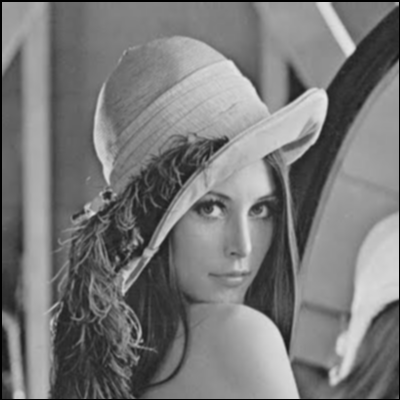

In [45]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import cv2
from google.colab.patches import cv2_imshow
from math import ceil
import numpy as np

kernel = [[0.077847, 0.123317, 0.077847], [0.123317, 0.195346, 0.123317], [0.077847, 0.123317, 0.077847]]
n = len(kernel)
imagem = cv2.imread('lena.jpg', 0)
cv2_imshow(imagem)
nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])

for i in range(len(imagem)):
  for j in range(len(imagem[i])):
    soma = 0
    if (i + n >= len(imagem)):
      break
    matriz_img = []
    for x in range(i, i + n):
      linha = []
      if (j + n >= len(imagem[i])):
        break
      for y in range(j, j + n):
        linha.append(imagem[x][y])
      matriz_img.append(linha)
    if len(matriz_img) > 0:
      for k in range(len(kernel)):
        for l in range(len(kernel[k])):
          soma = soma + kernel[k][l]*matriz_img[k][l]
      x_y = ceil(n/2) - 2
      nova_imagem[x - x_y][y - x_y] = soma

cv2_imshow(nova_imagem)

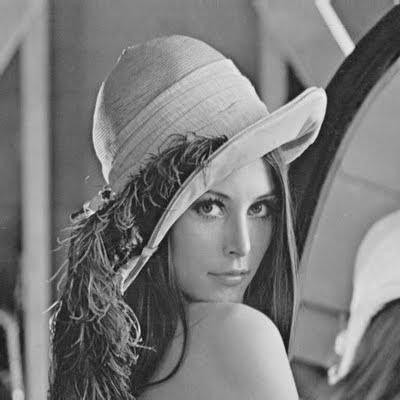

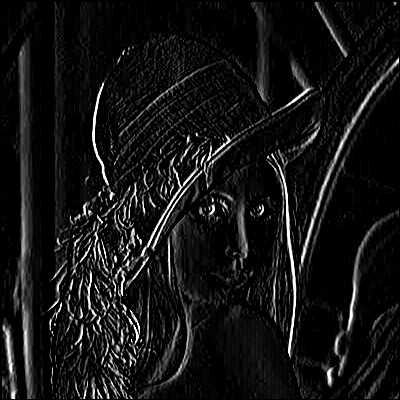

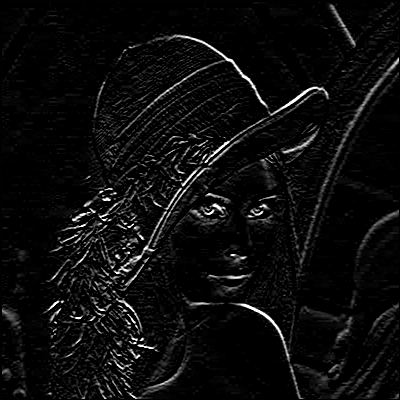

In [36]:
#Filtro de Sobel
kernel_horizontal = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
kernel_vertical = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
imagem = cv2.imread('lena.jpg', 0)
cv2_imshow(imagem)

def filtro_sobel(imagem, kernel):
  n = len(kernel)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      matriz_img = []
      for x in range(i, i + n):
        linha = []
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          linha.append(imagem[x][y])
        matriz_img.append(linha)
      if len(matriz_img) > 0:
        for k in range(len(kernel)):
          for l in range(len(kernel[k])):
            soma = soma + kernel[k][l]*matriz_img[k][l]
        x_y = ceil(n/2) - 2
        nova_imagem[x - x_y][y - x_y] = soma
  return nova_imagem

filtro_vertical = filtro_sobel(imagem, kernel_vertical)
filtro_horizontal = filtro_sobel(imagem, kernel_horizontal)

cv2_imshow(filtro_vertical)
cv2_imshow(filtro_horizontal)


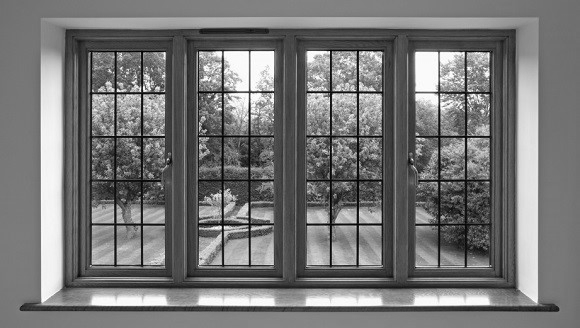

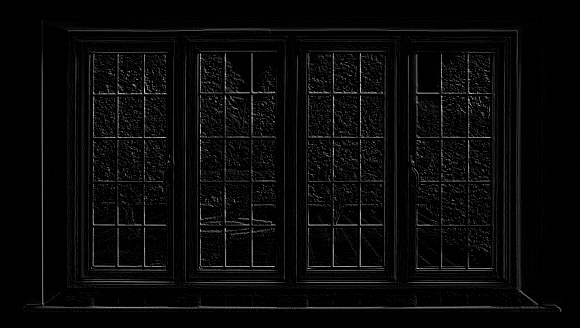

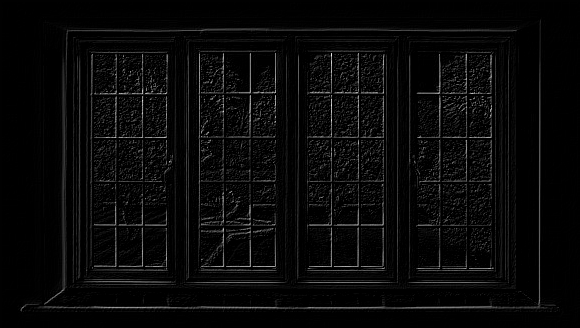

In [43]:
kernel_horizontal = [[1, 0], [0, -1]]
kernel_vertical = [[0, 1], [-1, 0]]
imagem = cv2.imread('borderWindow.png', 0)
cv2_imshow(imagem)

def filtro_roberts(imagem, kernel):
  n = len(kernel)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      matriz_img = []
      for x in range(i, i + n):
        linha = []
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          linha.append(imagem[x][y])
        matriz_img.append(linha)
      if len(matriz_img) > 0:
        for k in range(len(kernel)):
          for l in range(len(kernel[k])):
            soma = soma + kernel[k][l]*matriz_img[k][l]
        x_y = ceil(n/2) - 2
        nova_imagem[x - x_y][y - x_y] = soma
  return nova_imagem

filtro_vertical = filtro_roberts(imagem, kernel_vertical)
filtro_horizontal = filtro_roberts(imagem, kernel_horizontal)

cv2_imshow(filtro_vertical)
cv2_imshow(filtro_horizontal)

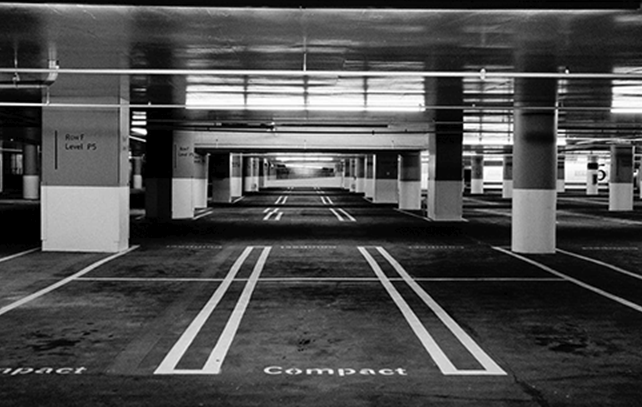

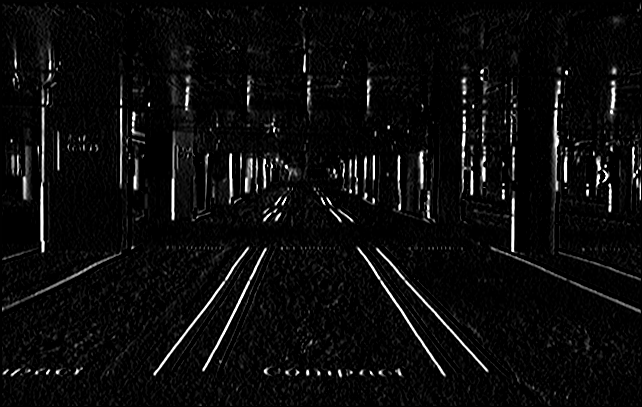

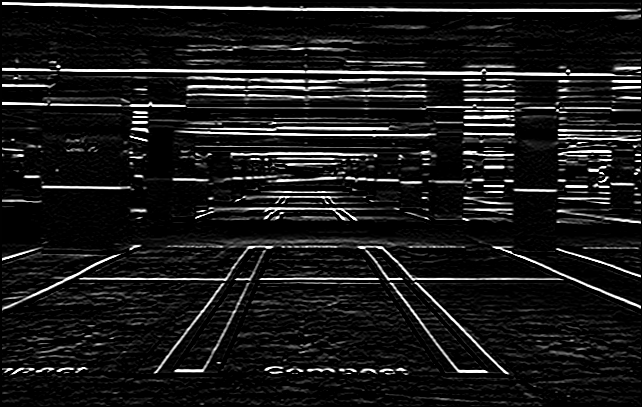

In [53]:
kernel_horizontal = [[-1, -1, -1],[0, 0, 0],[1, 1, 1]]
kernel_vertical = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
imagem = cv2.imread('borderParking.png', 0)
cv2_imshow(imagem)

def filtro_prewitt(imagem, kernel):
  n = len(kernel)
  nova_imagem = np.ones([imagem.shape[0], imagem.shape[1]])
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      soma = 0
      if (i + n >= len(imagem)):
        break
      matriz_img = []
      for x in range(i, i + n):
        linha = []
        if (j + n >= len(imagem[i])):
          break
        for y in range(j, j + n):
          linha.append(imagem[x][y])
        matriz_img.append(linha)
      if len(matriz_img) > 0:
        for k in range(len(kernel)):
          for l in range(len(kernel[k])):
            soma = soma + kernel[k][l]*matriz_img[k][l]
        x_y = ceil(n/2) - 2
        nova_imagem[x - x_y][y - x_y] = soma
  return nova_imagem

filtro_vertical = filtro_prewitt(imagem, kernel_vertical)
filtro_horizontal = filtro_prewitt(imagem, kernel_horizontal)

cv2_imshow(filtro_vertical)
cv2_imshow(filtro_horizontal)